In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4182,4902-OHLSK,Female,1,No,No,29,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,98.65,2862.75,Yes
2555,1849-RJYIG,Female,0,No,No,8,Yes,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,60.00,487.75,No
1739,9804-ICWBG,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
157,2749-CTKAJ,Male,0,Yes,Yes,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.15,419.9,No
5958,6859-RKMZJ,Male,0,Yes,No,11,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),55.05,608.15,No


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df_list=list(df[['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']])
df_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [7]:
for i in df_list:
    print(df[i].value_counts())
    print("---------------------")

Male      3555
Female    3488
Name: gender, dtype: int64
---------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
---------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
---------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
---------------------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
---------------------
No                     3095
Yes                    2422
No internet service    1526
Na

In [8]:
for i in df_list:
    print(i, df[i].unique())
    print("---------------------")

gender ['Female' 'Male']
---------------------
SeniorCitizen [0 1]
---------------------
Partner ['Yes' 'No']
---------------------
Dependents ['No' 'Yes']
---------------------
PhoneService ['No' 'Yes']
---------------------
MultipleLines ['No phone service' 'No' 'Yes']
---------------------
InternetService ['DSL' 'Fiber optic' 'No']
---------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
---------------------
OnlineBackup ['Yes' 'No' 'No internet service']
---------------------
DeviceProtection ['No' 'Yes' 'No internet service']
---------------------
TechSupport ['No' 'Yes' 'No internet service']
---------------------
StreamingTV ['No' 'Yes' 'No internet service']
---------------------
StreamingMovies ['No' 'Yes' 'No internet service']
---------------------
Contract ['Month-to-month' 'One year' 'Two year']
---------------------
PaperlessBilling ['Yes' 'No']
---------------------
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card

In [9]:
df1_list=list(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [10]:
re=('[! @ # $ % ^ & * ( ) _ + { } \ [ \ ] : ; < > , . ? ~ " \\ / \ ').split(" ")
re

['[!',
 '@',
 '#',
 '$',
 '%',
 '^',
 '&',
 '*',
 '(',
 ')',
 '_',
 '+',
 '{',
 '}',
 '\\',
 '[',
 '\\',
 ']',
 ':',
 ';',
 '<',
 '>',
 ',',
 '.',
 '?',
 '~',
 '"',
 '\\',
 '/',
 '\\',
 '']

In [11]:
for j in re:
    print( j )
    for i in df1_list:
        print((df[i]==j).value_counts())
    

[!
False    7043
Name: tenure, dtype: int64
False    7043
Name: MonthlyCharges, dtype: int64
False    7043
Name: TotalCharges, dtype: int64
@
False    7043
Name: tenure, dtype: int64
False    7043
Name: MonthlyCharges, dtype: int64
False    7043
Name: TotalCharges, dtype: int64
#
False    7043
Name: tenure, dtype: int64
False    7043
Name: MonthlyCharges, dtype: int64
False    7043
Name: TotalCharges, dtype: int64
$
False    7043
Name: tenure, dtype: int64
False    7043
Name: MonthlyCharges, dtype: int64
False    7043
Name: TotalCharges, dtype: int64
%
False    7043
Name: tenure, dtype: int64
False    7043
Name: MonthlyCharges, dtype: int64
False    7043
Name: TotalCharges, dtype: int64
^
False    7043
Name: tenure, dtype: int64
False    7043
Name: MonthlyCharges, dtype: int64
False    7043
Name: TotalCharges, dtype: int64
&
False    7043
Name: tenure, dtype: int64
False    7043
Name: MonthlyCharges, dtype: int64
False    7043
Name: TotalCharges, dtype: int64
*
False    7043
Name: tenu

In [12]:
for i in df1_list:
    print((df[i]==" ").value_counts())

False    7043
Name: tenure, dtype: int64
False    7043
Name: MonthlyCharges, dtype: int64
False    7032
True       11
Name: TotalCharges, dtype: int64


In [13]:
#TotalCharges is object type and have 11 null values/spaces

In [14]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [15]:
df["TotalCharges"].dtypes

dtype('float64')

In [16]:
df["TotalCharges"].isnull().sum() 

11

In [17]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
#as we can see only TotalCharges is having null values which significantly small in numbers we can drop it./
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
# import re
# # Define a regular expression pattern to match special characters
# special_char_pattern = re.compile(r'[!@#$%^&*()_+{}\[\]:;<>,.?~"\\/\']')

# # Count special characters in the entire DataFrame
# total_special_char_count = df.stack().str.count(special_char_pattern).sum()

# print("Total count of special characters in the DataFrame:", total_special_char_count)
# for i in df1_list:
#     print((df[i]==special_char_pattern).value_counts())

In [22]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [23]:
for i in df_list:
    print(i, df[i].unique())
    print("---------------------")

gender ['Female' 'Male']
---------------------
SeniorCitizen [0 1]
---------------------
Partner ['Yes' 'No']
---------------------
Dependents ['No' 'Yes']
---------------------
PhoneService ['No' 'Yes']
---------------------
MultipleLines ['No' 'Yes']
---------------------
InternetService ['DSL' 'Fiber optic' 'No']
---------------------
OnlineSecurity ['No' 'Yes']
---------------------
OnlineBackup ['Yes' 'No']
---------------------
DeviceProtection ['No' 'Yes']
---------------------
TechSupport ['No' 'Yes']
---------------------
StreamingTV ['No' 'Yes']
---------------------
StreamingMovies ['No' 'Yes']
---------------------
Contract ['Month-to-month' 'One year' 'Two year']
---------------------
PaperlessBilling ['Yes' 'No']
---------------------
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
---------------------
Churn ['No' 'Yes']
---------------------


In [24]:
#Checking for outliers

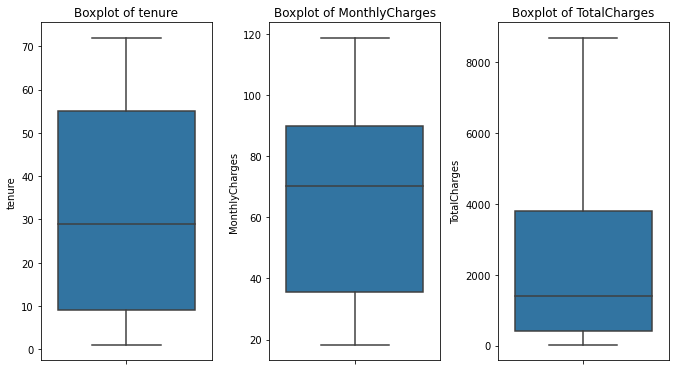

In [25]:
plt.figure(figsize = (19,15))
for i in range(len(df1_list)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = df[df1_list[i]], data = df)
    plt.title('Boxplot of {}'.format(df1_list[i]))
    plt.tight_layout()

In [26]:
#no outliers are there

In [27]:
df_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

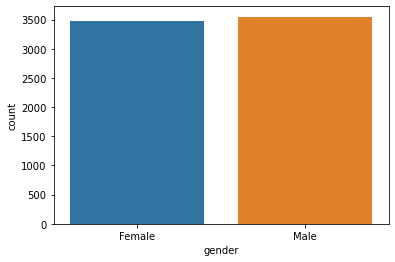

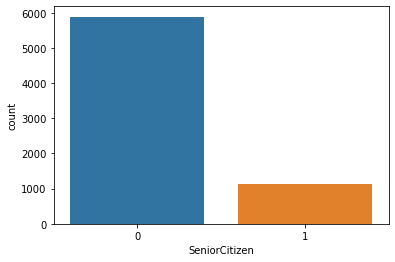

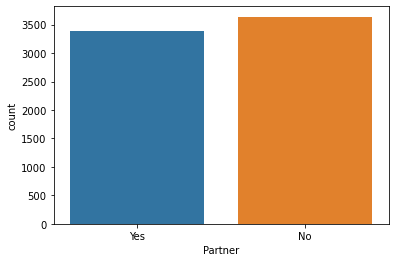

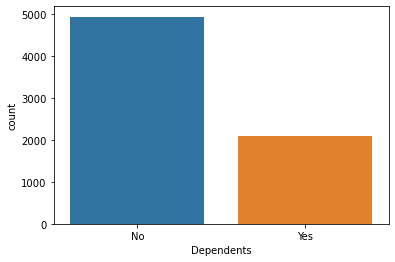

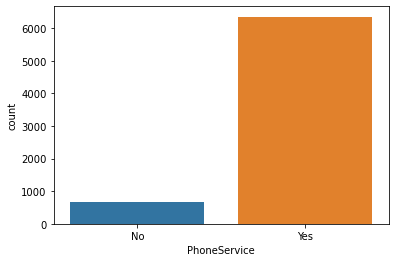

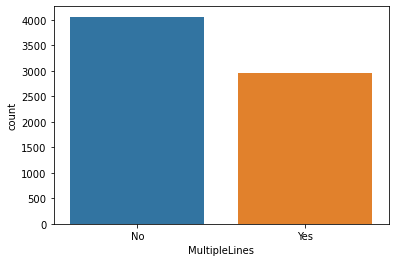

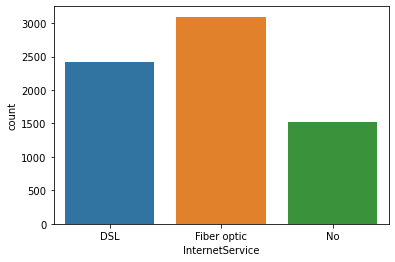

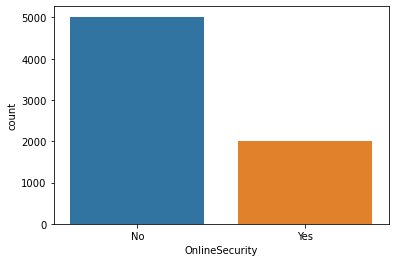

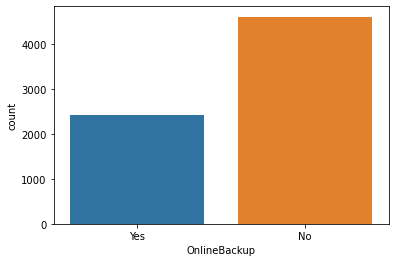

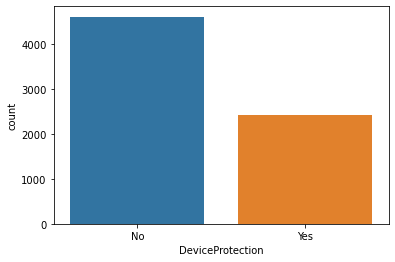

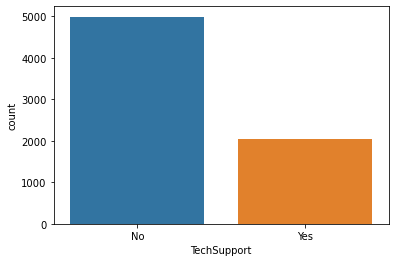

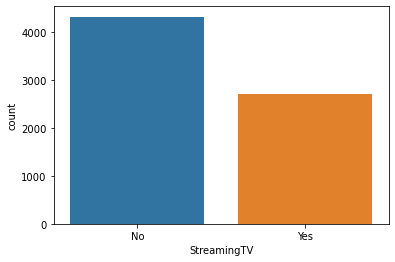

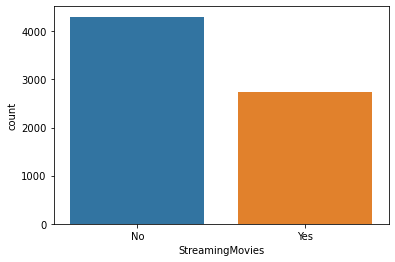

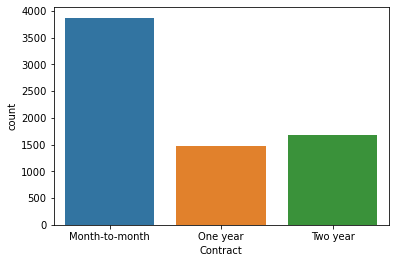

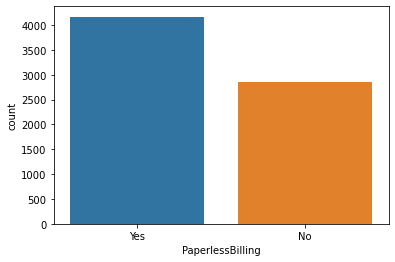

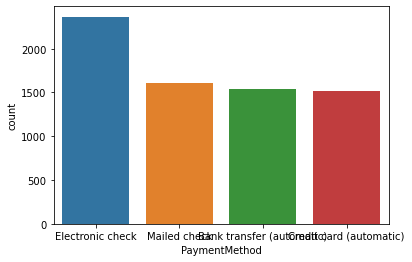

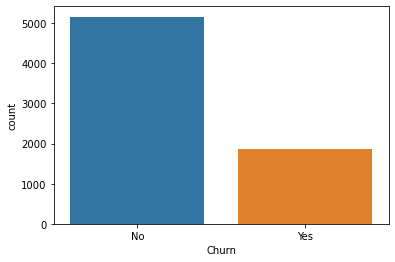

In [28]:
for i in range(len(df_list)):
    sns.countplot(data = df, x = df[df_list[i]])
    plt.show() 

In [29]:
df1=df[['tenure', 'MonthlyCharges', 'TotalCharges']]

<AxesSubplot:>

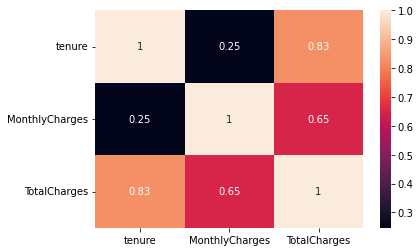

In [30]:
sns.heatmap(df1.corr(), annot=True)

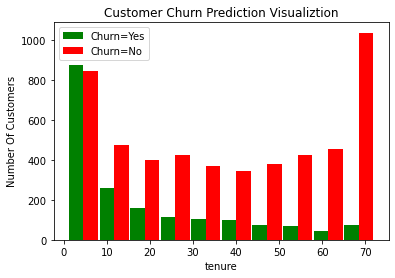

In [31]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

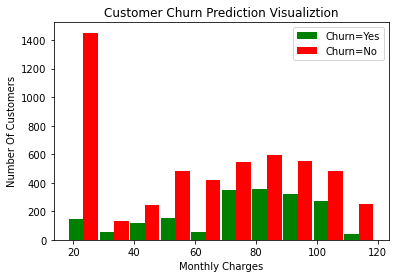

In [32]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [33]:
#Converting Yes No Columns to 1 and 0 

In [34]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [35]:
for i in df_list:
    print(i, df[i].unique())
    print("---------------------")

gender ['Female' 'Male']
---------------------
SeniorCitizen [0 1]
---------------------
Partner [1 0]
---------------------
Dependents [0 1]
---------------------
PhoneService [0 1]
---------------------
MultipleLines [0 1]
---------------------
InternetService ['DSL' 'Fiber optic' 'No']
---------------------
OnlineSecurity [0 1]
---------------------
OnlineBackup [1 0]
---------------------
DeviceProtection [0 1]
---------------------
TechSupport [0 1]
---------------------
StreamingTV [0 1]
---------------------
StreamingMovies [0 1]
---------------------
Contract ['Month-to-month' 'One year' 'Two year']
---------------------
PaperlessBilling [1 0]
---------------------
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
---------------------
Churn [0 1]
---------------------


In [36]:
df["gender"].replace({"Female":1,"Male":0},inplace=True)

In [37]:
df["gender"].unique()

array([1, 0], dtype=int64)

In [38]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [40]:
#as we can see all the columns have values 0 or 1 except tenure, monthlycharges, totalcharges columns 
#so we need to do scaling on the data for the required columns

In [41]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [42]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [43]:
df_scaled_list=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
for i in df_scaled_list:
    print(i, df1[i].unique())
    print("---------------------")

gender [1 0]
---------------------
SeniorCitizen [0 1]
---------------------
Partner [1 0]
---------------------
Dependents [0 1]
---------------------
tenure [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
---------------------
PhoneService [0 

In [44]:
#train and test split

In [124]:
#using logistic regression

In [45]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [47]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [125]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [126]:
predictions=logmodel.predict(X_test)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [128]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8372


[0.37657859921455383, 0.8372423648834229]

In [48]:
#Build a model (ANN) in tensorflow/keras

In [49]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4979 - accuracy: 0.7547
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.7932
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.7952
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.7996
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8030
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.7979
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8027
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8046
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8071
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4071 - accura

In [50]:
yp = model.predict(X_test)

44/44 [==============================] - 0s 818us/step


In [51]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 975us/step - loss: 0.4814 - accuracy: 0.7754


[0.4813825488090515, 0.7754086852073669]

In [52]:
yp[:10]

array([[0.02117427],
       [0.8760873 ],
       [0.00419118],
       [0.21659952],
       [0.1650381 ],
       [0.6558617 ],
       [0.04557585],
       [0.11122579],
       [0.7743849 ],
       [0.00769632]], dtype=float32)

In [53]:
#as y_test is either 0 or 1 and predicted value is coming as 2 dimentional array with float numbers 
#so we will make the predicted value eith 0 or 1 as sigmoid function

In [54]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0) 

In [55]:
y_pred[:10]

[0, 1, 0, 0, 0, 1, 0, 0, 1, 0]

In [56]:
y_test[:10]

974     0
619     0
4289    0
3721    1
4533    0
445     1
5898    0
3387    0
1346    1
5690    0
Name: Churn, dtype: int64

In [57]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

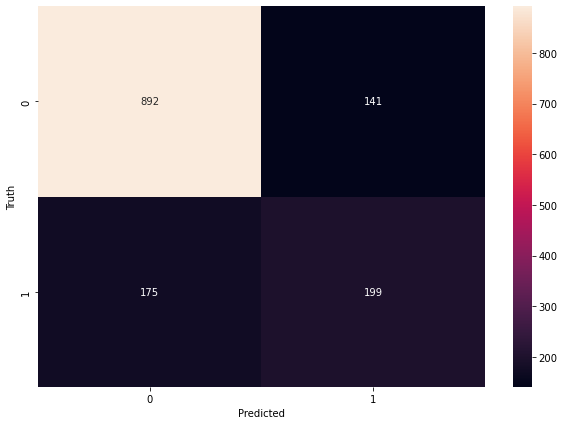

In [58]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
#model with drop out layer with batch gradient descent to avoid the over fitting and underfitting

In [60]:
modeld = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
704/704 [==============================] - 2s 1ms/step - loss: 0.5369 - accuracy: 0.7189
Epoch 2/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4698 - accuracy: 0.7678
Epoch 3/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4612 - accuracy: 0.7797
Epoch 4/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4499 - accuracy: 0.7804
Epoch 5/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4457 - accuracy: 0.7876
Epoch 6/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4443 - accuracy: 0.7824
Epoch 7/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4403 - accuracy: 0.7881
Epoch 8/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4397 - accuracy: 0.7854
Epoch 9/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4328 - accuracy: 0.7966
Epoch 10/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4322 - accura

In [61]:
modeld.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7918


[0.4333451986312866, 0.7917554974555969]

In [62]:
yp1=modeld.predict(X_test)
yp1[:10]

44/44 [==============================] - 0s 1ms/step


array([[0.01333124],
       [0.6458988 ],
       [0.00193767],
       [0.3089938 ],
       [0.0659445 ],
       [0.44390124],
       [0.02792912],
       [0.19338922],
       [0.60764027],
       [0.01254668]], dtype=float32)

In [63]:
y_pred1 = []
for element in yp1:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0) 

In [64]:
y_pred1[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]

In [65]:
y_test[:10]

974     0
619     0
4289    0
3721    1
4533    0
445     1
5898    0
3387    0
1346    1
5690    0
Name: Churn, dtype: int64

In [66]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

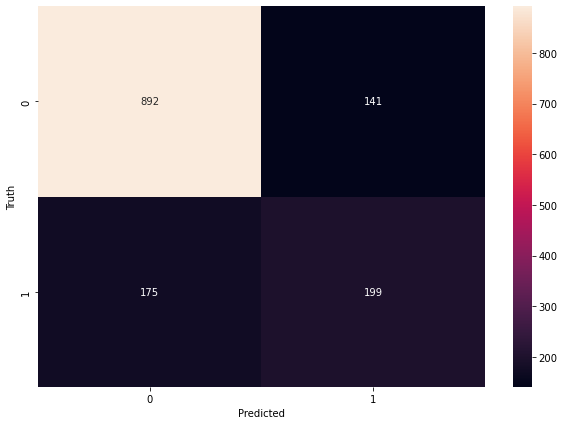

In [67]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
#Mitigating Skewdness of Data or handling imbalanced data
#Method 1: Undersampling:Reduce the number of instances in the majority class to balance the class distribution. 
#However, this might lead to loss of information.

In [69]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [70]:
# Class count
count_class_0, count_class_1 = df.Churn.value_counts()
count_class_0, count_class_1

(5163, 1869)

In [71]:
# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [72]:
df_class_0.shape

(5163, 27)

In [73]:
df_class_1.shape

(1869, 27)

In [74]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [75]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [76]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [77]:
#as we need to run the model multiple time so we are making a function ANN for it

In [78]:
def ANN (X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=100)
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [79]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6018 - accuracy: 0.6863
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.7589
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.7669
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.7702
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7696
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7736
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7746
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7739
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7702
Epoch 11/

In [80]:
#precision, recall and f1-score for class 1 has increased and decreased for class 0

In [81]:
#Method2: Oversampling

In [82]:
count_class_0, count_class_1

(5163, 1869)

In [83]:
# Oversample 1-class and concat the DataFrames of both classes

In [84]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [85]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over["Churn"].value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [86]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [87]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [88]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [89]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7407
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7660
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7680
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7712
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7760
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7728
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7786
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7841
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.7831
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4506 - accura

### Method3: SMOTE

In [90]:
#SMOTE create synthetic samples/examples of the minority class using Knearest neighbour algo

In [91]:
!pip install imbalanced-learn 

You should consider upgrading via the 'C:\Users\Gulshan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [92]:
X = df1.drop('Churn',axis=1)
y = df1['Churn']

In [93]:
df1.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [94]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [95]:
X.shape

(7032, 26)

In [96]:
y.shape

(7032,)

In [97]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm= smote.fit_resample(X, y)

In [98]:
# The fit_sample method generates synthetic samples for the minority class and returns two new arrays:

# X_sm: This is the new feature matrix with the synthetic samples added to the minority class. It will have a balanced class distribution.
# y_sm: This is the new label vector with the corresponding labels for the synthetic samples

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [103]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [104]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5172 - accuracy: 0.7538
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7801
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.7860
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7887
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7892
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.7929
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7967
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7962
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8002
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4222 - accura

### Method4: Use of Ensemble with undersampling

In [105]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [106]:
# Regain Original features and labels
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [108]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [109]:
df2 = X_train.copy()
df2['Churn'] = y_train

In [110]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [111]:
df2_class0 = df2[df2.Churn==0]
df2_class1 = df2[df2.Churn==1]

In [112]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [113]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6997
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7565
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7689
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7689
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.7736
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7742
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7742
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7742
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7722
Epoch 11/

In [118]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6055 - accuracy: 0.6803
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5145 - accuracy: 0.7512
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.7676
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7736
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7732
Epoch 11/

In [115]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7507
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7620
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7681
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7746
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7723
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7795
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7769
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7806
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7848
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.7814
Epoch 11/

In [116]:
len(y_pred1)

1407

In [120]:
len(y_pred2)

1407

In [119]:
len(y_pred3)

1407

In [121]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [123]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.66      0.77      1033
           1       0.46      0.80      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.79      0.70      0.72      1407

